In [1]:
import pandas as pd
data = pd.read_csv("/Users/anumdamani/thesis/fiction_combined_21025/updated_fiction_official.csv")

In [2]:
data

,title,author,year,cover_url,description,label,num_assigned,image_name,clean_text,sentence_vector
0,Mockingjay,Suzanne Collins,2010.0,https://covers.openlibrary.org/b/id/12646459-L...,"Against all odds, Katniss Everdeen has survive...",0,1,0001.jpg,odds katniss everdeen survived hunger game twi...,[ 0.00678643 0.43330735 -0.01312667 0.194417...
1,The Fault in Our Stars,John Green,2010.0,https://covers.openlibrary.org/b/id/7418786-L.jpg,Despite the tumor-shrinking medical miracle th...,0,2,0002.jpg,despite tumorshrinking medical miracle bought ...,[ 0.00611202 0.37484074 -0.00746725 0.167736...
2,Bring Up the Bodies,Hilary Mantel,2012.0,https://covers.openlibrary.org/b/id/10236749-L...,Bring Up the Bodies is a historical novel by H...,0,3,0003.jpg,bring body historical novel hilary mantel sequ...,[ 0.0065356 0.4353443 -0.0068384 0.196090...
3,The Ocean at the End of the Lane,"Neil Gaiman, Mónica Faerna, Patrick Marcel, Ll...",2013.0,https://covers.openlibrary.org/b/id/7258156-L.jpg,A middle-aged man returns to his childhood hom...,0,4,0004.jpg,middleaged man return childhood home attend fu...,[ 0.00676669 0.45654806 -0.01299752 0.204902...
4,The Passage,Justin Cronin,2010.0,https://covers.openlibrary.org/b/id/8261369-L.jpg,"The Passage is a novel by Justin Cronin, publi...",0,5,0005.jpg,passage novel justin cronin published 2010 bal...,[ 4.96416586e-03 5.00439346e-01 -1.58422515e-...
...,...,...,...,...,...,...,...,...,...,...
4661,THE PERFECT MARRIAGE,Jeneva Rose,2020.0,https://storage.googleapis.com/du-prd/books/im...,A criminal defense attorney vows to defend her...,1,4662,4662.jpg,criminal defense attorney vow defend husband a...,[ 0.00478328 0.28410912 -0.00327534 0.126027...
4662,QUICKSILVER,Callie Hart,2024.0,https://storage.googleapis.com/du-prd/books/im...,Saeris is transported to a dangerous land of i...,1,4663,4663.jpg,saeris transported dangerous land ice snow mus...,[ 0.00477637 0.38590768 -0.00778222 0.171456...
4663,TOM CLANCY: DEFENSE PROTOCOL,Brian Andrews and Jeffrey Wilson,NaN,https://storage.googleapis.com/du-prd/books/im...,The 25th book in the Jack Ryan series. When Ta...,1,4664,4664.jpg,25th book jack ryan series taiwan come threat ...,[ 8.33243784e-03 7.31523216e-01 -1.90428477e-...
4664,WIND AND TRUTH,Brandon Sanderson,2024.0,https://storage.googleapis.com/du-prd/books/im...,The fifth book in the Stormlight Archive serie...,1,4665,4665.jpg,fifth book stormlight archive series fate cosm...,[ 4.11352562e-03 3.95059615e-01 -8.75161029e-...


In [3]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    text = text.lower()  # Convert to lowercase
    
    # Remove possessives ('s) and contraction remnants (n't)
    text = re.sub(r"\'s", "", text)  # Remove possessives
    text = re.sub(r"n\'t", " not", text)  # Expand "n't" to "not"
    
    # Keep contractions but remove other punctuation
    text = re.sub(r"[^\w\s']", "", text)  # Remove punctuation except for apostrophes in contractions
    
    tokens = word_tokenize(text)  # Tokenize words
    
    # Lemmatization & stopword removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)  # Rejoin words into a string

# Apply preprocessing
data["clean_text"] = data["description"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anumdamani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anumdamani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anumdamani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Logistic Regression

## LR - TF-IDF

In [4]:
### TFIDF
# LOG REG WITH TFIDF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_text'], data['label'], test_size=0.2, random_state=42
)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

LogisticRegression()

PR curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new/logreg_tfidf_threshold_curve.png


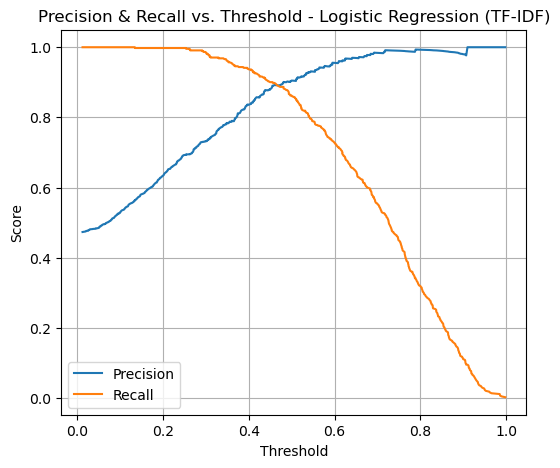

In [5]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import os

output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new"
os.makedirs(output_dir, exist_ok=True)

# Get predicted probabilities
y_probs = logreg.predict_proba(X_test_tfidf)[:, 1]

# Compute Precision-Recall curve
plt.figure(figsize=(6, 5))
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs. Threshold - Logistic Regression (TF-IDF)')
plt.legend()
plt.grid()
#plt.show()
# Save the figure
pr_curve_path = os.path.join(output_dir, "logreg_tfidf_threshold_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
print(f"PR curve saved at: {pr_curve_path}")
plt.show()
plt.close()

In [6]:
# Get predicted probabilities
y_probs = logreg.predict_proba(X_test_tfidf)[:, 1]  # Probability of class 1

# Define a custom threshold
threshold = 0.5

# Classify based on the threshold
y_pred_threshold = (y_probs >= threshold).astype(int)

# Evaluate model with the new threshold
accuracy = accuracy_score(y_test, y_pred_threshold)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred_threshold))

# Explanation: default threshold already gives me a strong precision, slightly lower recall and decent F1-score.
# Increasing the threshold to 0.6 drops recall a little too much for my liking.

Accuracy: 0.8908
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       492
           1       0.90      0.86      0.88       442

    accuracy                           0.89       934
   macro avg       0.89      0.89      0.89       934
weighted avg       0.89      0.89      0.89       934



Precision-Recall Curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new/logreg_tfidf_precision_recall_curve.png


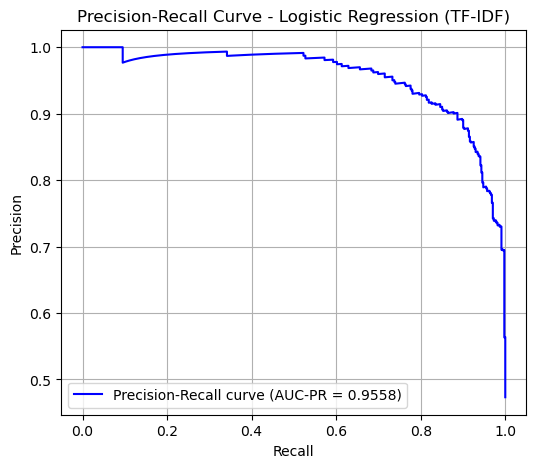

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import os
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new"
os.makedirs(output_dir, exist_ok=True)

# Get predicted probabilities
y_probs = logreg.predict_proba(X_test_tfidf)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

# Compute AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AUC-PR = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression (TF-IDF)')
plt.legend(loc='lower left')
plt.grid()
# Save the figure
pr_curve_path = os.path.join(output_dir, "logreg_tfidf_precision_recall_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
print(f"Precision-Recall Curve saved at: {pr_curve_path}")
plt.show()
plt.close()

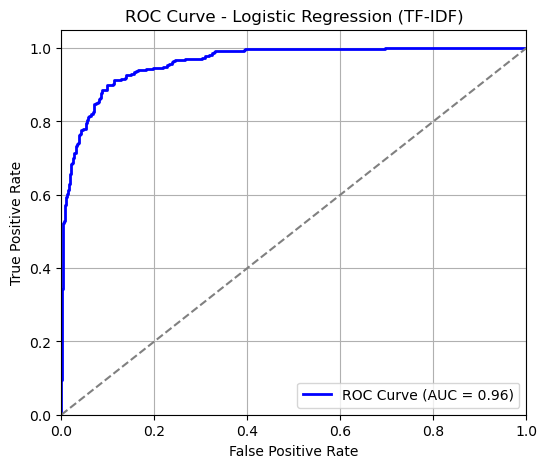

ROC curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new/logreg_tfidf_roc_curve.png


In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import os

output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new"
os.makedirs(output_dir, exist_ok=True) 

# Get predicted probabilities
y_pred_probs = logreg.predict_proba(X_test_tfidf)[:, 1]  # Probability for the positive class

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (TF-IDF)')
plt.legend(loc='lower right')
plt.grid()
# Save the figure
os.makedirs(output_dir, exist_ok=True)  
roc_curve_path = os.path.join(output_dir, "logreg_tfidf_roc_curve.png")
plt.savefig(roc_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"ROC curve saved at: {roc_curve_path}")

Confusion Matrix:
 [[452  40]
 [ 62 380]]
Confusion matrix saved at: /Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new/logreg_tfidf_confusion_matrix.png


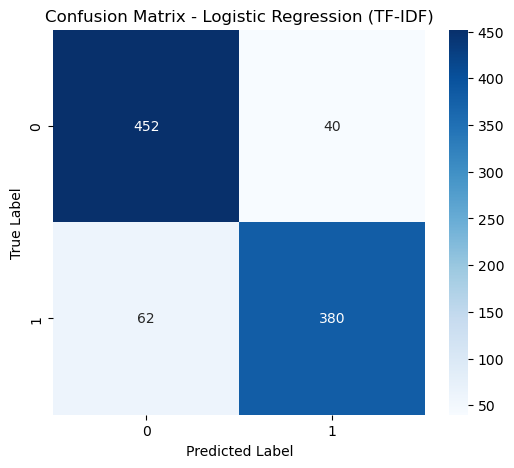

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# Define output directory
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/logistic_regression/new"
os.makedirs(output_dir, exist_ok=True) 

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_threshold)

# Print Confusion Matrix as an array
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
# Save the figure
conf_matrix_path = os.path.join(output_dir, "logreg_tfidf_confusion_matrix.png")
plt.savefig(conf_matrix_path, dpi=300, bbox_inches="tight")
print(f"Confusion matrix saved at: {conf_matrix_path}")
plt.show()
plt.close()

## Naive Bayes

## TF-IDF

In [16]:
import pandas as pd
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000) 
X = vectorizer.fit_transform(data["clean_text"])
y = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

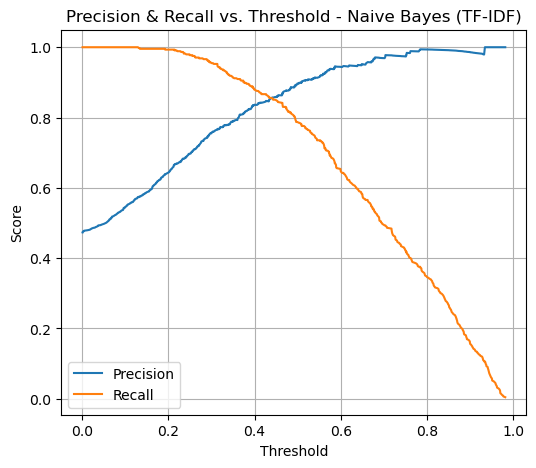

PR curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/naivebayes/new/naivebayes_tfidf_threshold_curve.png


In [17]:
# Define output directory
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/naivebayes/new"
os.makedirs(output_dir, exist_ok=True) 

# Get predicted probabilities from the Word2Vec model
y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# Compute Precision-Recall curve
plt.figure(figsize=(6, 5))
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs. Threshold - Naive Bayes (TF-IDF)')
plt.legend()
plt.grid()
#plt.show()
# Save the figure
pr_curve_path = os.path.join(output_dir, "naivebayes_tfidf_threshold_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"PR curve saved at: {pr_curve_path}")

In [18]:
# Get probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  

# Apply custom threshold 
threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Explanation: keeping threshold at 0.5 because 0.6 drops recall too much for the positive class

Accuracy: 0.8554603854389722
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       492
           1       0.90      0.79      0.84       442

    accuracy                           0.86       934
   macro avg       0.86      0.85      0.85       934
weighted avg       0.86      0.86      0.85       934



In [19]:
# y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# # Apply custom threshold
# threshold = 0.5  
# y_pred_custom = (y_probs >= threshold).astype(int)

# # Evaluate
# accuracy = accuracy_score(y_test, y_pred_custom)
# precision = precision_score(y_test, y_pred_custom)
# recall = recall_score(y_test, y_pred_custom)
# f1 = f1_score(y_test, y_pred_custom)

# print(f'Accuracy: {accuracy:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_custom))

Confusion Matrix:
 [[452  40]
 [ 95 347]]


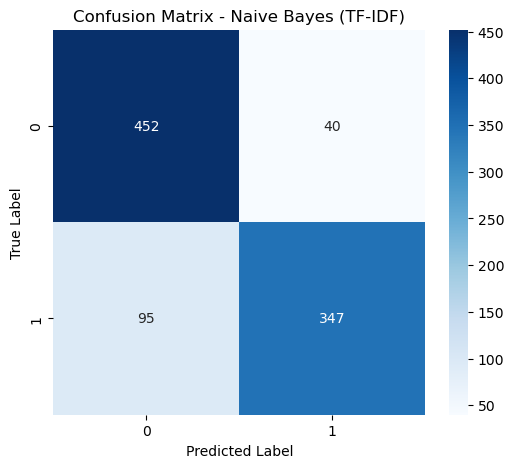

Confusion matrix saved at: /Users/anumdamani/thesis/text_modeling_outputs/naivebayes/new/naivebayes_confusion_matrix.png


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# Define output directory
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/naivebayes/new"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix as an Array
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes (TF-IDF)")

# Save the figure
conf_matrix_path = os.path.join(output_dir, "naivebayes_confusion_matrix.png")
plt.savefig(conf_matrix_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"Confusion matrix saved at: {conf_matrix_path}")

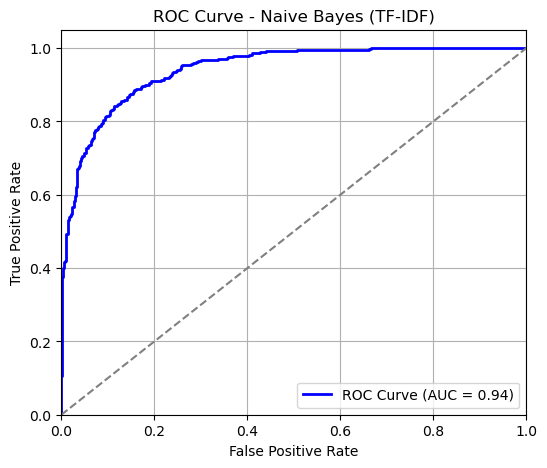

ROC curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/naivebayes/new/naivebayes_roc_curve.png


In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (for class 1)
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes (TF-IDF)")
plt.legend(loc="lower right")
plt.grid()
# Save the figure before displaying
roc_curve_path = os.path.join(output_dir, "naivebayes_roc_curve.png")
plt.savefig(roc_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"ROC curve saved at: {roc_curve_path}")

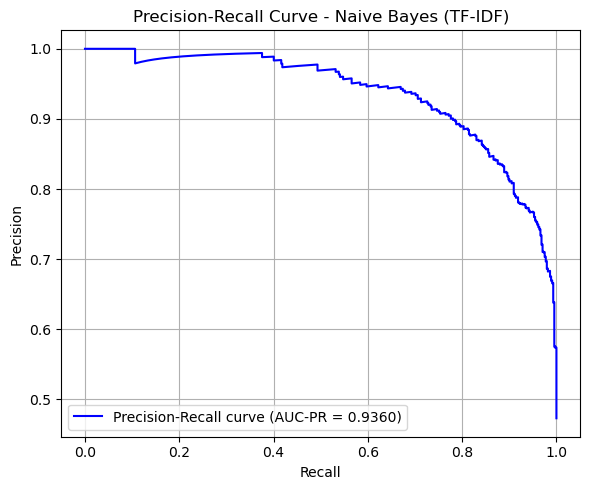

PR curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/naivebayes/new/naivebayes_tfidf_pr_curve.png


In [22]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute AUC for Precision-Recall curve
pr_auc = auc(recalls, precisions)

# Plot the curve
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color='blue', label=f'Precision-Recall curve (AUC-PR = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes (TF-IDF)')
plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
# Save the figure
pr_curve_path = os.path.join(output_dir, "naivebayes_tfidf_pr_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"PR curve saved at: {pr_curve_path}")

## Random Forest

## TF-IDF

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size for efficiency
X = vectorizer.fit_transform(data["clean_text"])
y = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)  
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

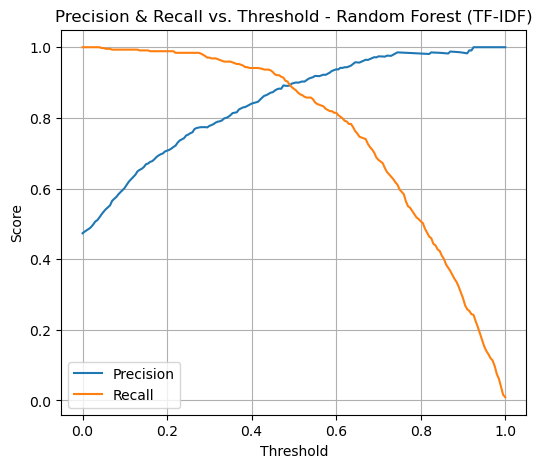

PR curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/randomforest_tfidf/new/randomforest_tfidf_threshold_curve.png


In [24]:
# Define output directory
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/randomforest_tfidf/new"
os.makedirs(output_dir, exist_ok=True) 

y_probs = clf.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# Compute Precision-Recall curve
plt.figure(figsize=(6, 5))
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs. Threshold - Random Forest (TF-IDF)')
plt.legend()
plt.grid()
#plt.show()
# Save the figure
pr_curve_path = os.path.join(output_dir, "randomforest_tfidf_threshold_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"PR curve saved at: {pr_curve_path}")

In [25]:
y_probs = clf.predict_proba(X_test)[:, 1]  # Get the probability of class 1 (positive class)

# Apply custom threshold 
threshold = 0.6 # Adjust this value
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_custom))

# Print classification report
print(classification_report(y_test, y_pred_custom))

# Explanation: 0.5 gives more balanced precision (0.9) and recall (0.88) for the positive class. 
# Increasing the threshold to 0.6 allows for a higher precision (0.94) and a lower, but still strong recall (0.81).
# And after increasing the threshold to 0.6, the F1-score for the positive class only drops by 0.02, at 0.87 now. 

Accuracy: 0.8865096359743041
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       492
           1       0.94      0.81      0.87       442

    accuracy                           0.89       934
   macro avg       0.89      0.88      0.88       934
weighted avg       0.89      0.89      0.89       934



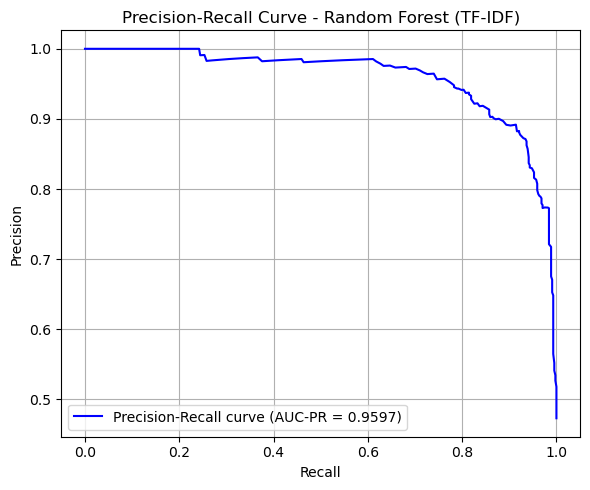

PR curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/randomforest_tfidf/new/randomforest_tfidf_pr_curve.png


In [26]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Define output directory
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/randomforest_tfidf/new"
os.makedirs(output_dir, exist_ok=True)  

# Compute Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute AUC for Precision-Recall curve
pr_auc = auc(recalls, precisions)

# Plot the curve
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color='blue', label=f'Precision-Recall curve (AUC-PR = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (TF-IDF)')
plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
# Save the figure
pr_curve_path = os.path.join(output_dir, "randomforest_tfidf_pr_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"PR curve saved at: {pr_curve_path}")

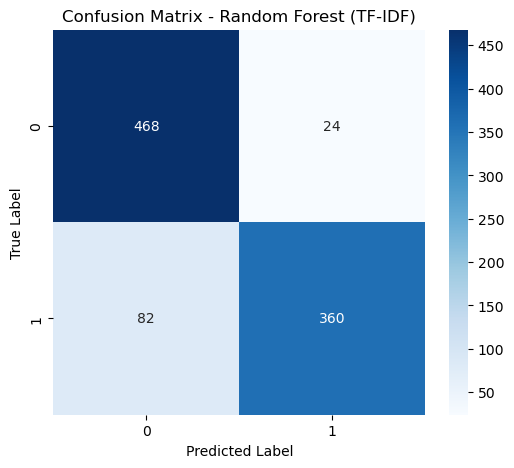

Confusion matrix saved at: /Users/anumdamani/thesis/text_modeling_outputs/randomforest_tfidf/new/randomforest_tfidf_confusion_matrix.png


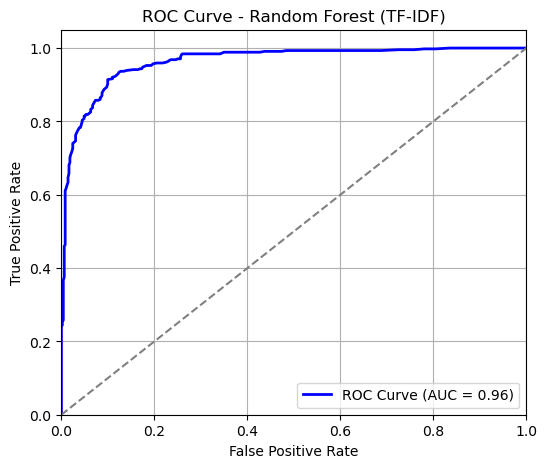

ROC curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/randomforest_tfidf/new/randomforest_tfidf_roc_curve.png


In [27]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (TF-IDF)")
# Save the figure
conf_matrix_path = os.path.join(output_dir, "randomforest_tfidf_confusion_matrix.png")
plt.savefig(conf_matrix_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"Confusion matrix saved at: {conf_matrix_path}")


# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (TF-IDF)")
plt.legend(loc="lower right")
plt.grid()
# Save the figure before displaying
roc_curve_path = os.path.join(output_dir, "randomforest_tfidf_roc_curve.png")
plt.savefig(roc_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"ROC curve saved at: {roc_curve_path}")

## XGBoost

## TF-IDF

In [33]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000) 
X_tfidf = tfidf.fit_transform(data["clean_text"]) 
y = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

/Users/anumdamani/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:39:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

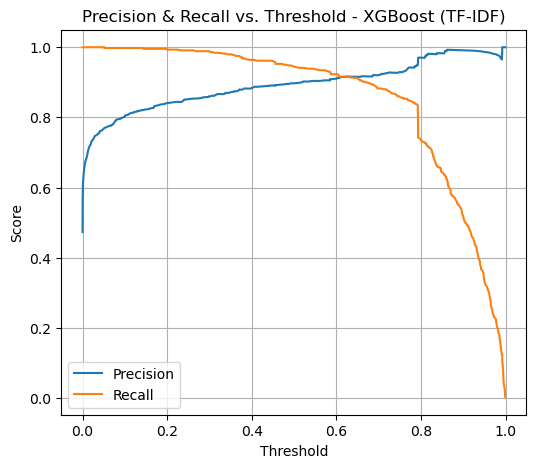

PR curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/xgboost_tfidf/new/xgboost_tfidf_threshold_curve.png


In [34]:
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/xgboost_tfidf/new"
os.makedirs(output_dir, exist_ok=True) 

y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for class 1

# Compute Precision-Recall curve
plt.figure(figsize=(6, 5))
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds_pr, precision[:-1], label='Precision')
plt.plot(thresholds_pr, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs. Threshold - XGBoost (TF-IDF)')
plt.legend()
plt.grid()
#plt.show()
# Save the figure
pr_curve_path = os.path.join(output_dir, "xgboost_tfidf_threshold_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"PR curve saved at: {pr_curve_path}")

In [35]:
y_probs = model.predict_proba(X_test)[:, 1]  # Get the probability of class 1 (positive class)

threshold = 0.7 
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_custom))

# Print classification report
print(classification_report(y_test, y_pred_custom))

# Explanation: At 0.6, precision and recall are fairly balanced.
# After increasing from 0.6 to 0.7, precision increases from 0.91 to 0.92, and recall drops from 0.92 to 0.88. The F1 drops from 0.92 to 0.90.
# Therefore 0.7 is the best threshold.

Accuracy: 0.9089935760171306
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       492
           1       0.92      0.88      0.90       442

    accuracy                           0.91       934
   macro avg       0.91      0.91      0.91       934
weighted avg       0.91      0.91      0.91       934



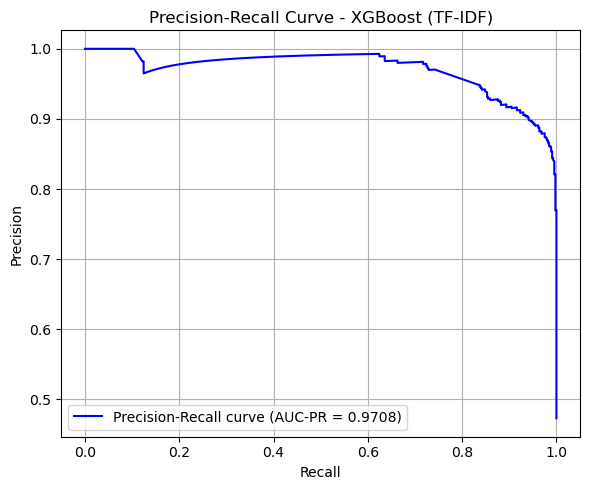

PR curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/xgboost_tfidf/new/xgboost_tfidf_pr_curve.png


In [36]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Define output directory
output_dir = "/Users/anumdamani/thesis/text_modeling_outputs/xgboost_tfidf/new"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
# Compute Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute AUC for Precision-Recall curve
pr_auc = auc(recalls, precisions)

# Plot the curve
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color='blue', label=f'Precision-Recall curve (AUC-PR = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost (TF-IDF)')
plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
# Save the figure
pr_curve_path = os.path.join(output_dir, "xgboost_tfidf_pr_curve.png")
plt.savefig(pr_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"PR curve saved at: {pr_curve_path}")

Confusion Matrix:
 [[459  33]
 [ 52 390]]


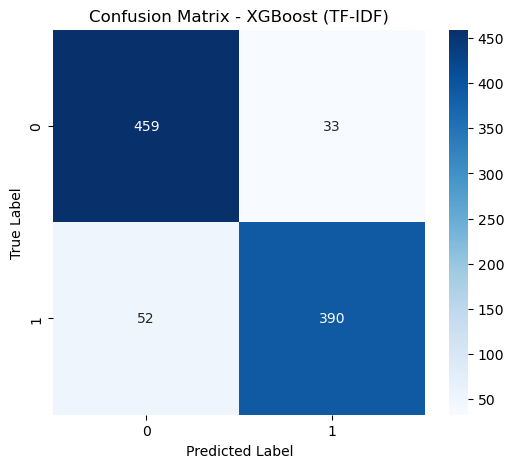

Confusion matrix saved at: /Users/anumdamani/thesis/text_modeling_outputs/xgboost_tfidf/new/xgboost_tfidf_confusion_matrix.png


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)

# Print Confusion Matrix as an Array
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (TF-IDF)")
# Save the figure
conf_matrix_path = os.path.join(output_dir, "xgboost_tfidf_confusion_matrix.png")
plt.savefig(conf_matrix_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"Confusion matrix saved at: {conf_matrix_path}")

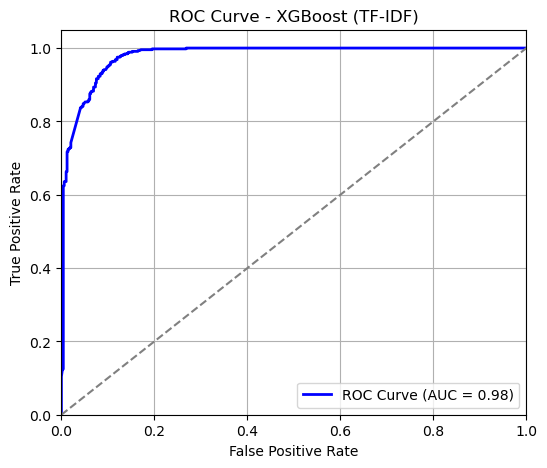

ROC curve saved at: /Users/anumdamani/thesis/text_modeling_outputs/xgboost_tfidf/new/xgboost_tfidf_roc_curve.png


In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (TF-IDF)")
plt.legend(loc="lower right")
plt.grid()
# Save the figure before displaying
roc_curve_path = os.path.join(output_dir, "xgboost_tfidf_roc_curve.png")
plt.savefig(roc_curve_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print(f"ROC curve saved at: {roc_curve_path}")